# Processing a Portfolio of Stocks #

This project provides an easy to use functionality to implement and evaluate automatic stock trading strategies. It is implemented in java and therefore can be used in any environment which builds on the JVM.

It provides the following functionality:
- Simple access to stock data
- Declarative formulation of trading strategies
- Evaluation of trading strategies
- Optimization of trading strategies
- Support of portfolio of multiple stocks / trading strategies

In this document we demonstrate 'Support of portfolio of multiple trading strategies'
 using Scala. We are using JupyterLab (http://jupyter.org) with the BeakerX (http://beakerx.com/) Scala Kernel.

We can minimize the risk by investing in multiple stocks.


## Setup ##
First you need to install the java libraries:

In [15]:
%classpath config resolver maven-public http://pschatzmann.ch:8081/repository/maven-public/
%classpath add mvn ch.pschatzmann:investor:0.9-SNAPSHOT
%classpath add mvn ch.pschatzmann:jupyter-jdk-extensions:0.0.1-SNAPSHOT


### Imports ###

In [16]:
// our stock evaluation framwork
import ch.pschatzmann.dates._;
import ch.pschatzmann.stocks._;
import ch.pschatzmann.stocks.data.universe._;
import ch.pschatzmann.stocks.input._;
import ch.pschatzmann.stocks.accounting._;
import ch.pschatzmann.stocks.accounting.kpi._;
import ch.pschatzmann.stocks.execution._;
import ch.pschatzmann.stocks.execution.fees._;
import ch.pschatzmann.stocks.execution.price._;
import ch.pschatzmann.stocks.parameters._;
import ch.pschatzmann.stocks.strategy._;
import ch.pschatzmann.stocks.strategy.optimization._;
import ch.pschatzmann.stocks.strategy.allocation._;
import ch.pschatzmann.stocks.strategy.selection._;
import ch.pschatzmann.stocks.integration._;
import ch.pschatzmann.stocks.integration.ChartData.FieldName._;
import ch.pschatzmann.stocks.strategy.OptimizedStrategy.Schedule._;

// java
import java.util.stream.Collectors;
import java.util._;
import java.lang._;
import java.util.function.Consumer;

/// jupyter custom displayer
import ch.pschatzmann.display.Displayers




import ch.pschatzmann.dates._
import ch.pschatzmann.stocks._
import ch.pschatzmann.stocks.data.universe._
import ch.pschatzmann.stocks.input._
import ch.pschatzmann.stocks.accounting._
import ch.pschatzmann.stocks.accounting.kpi._
import ch.pschatzmann.stocks.execution._
import ch.pschatzmann.stocks.execution.fees._
import ch.pschatzmann.stocks.execution.price._
import ch.pschatzmann.stocks.parameters._
import ch.pschatzmann.stocks.strategy._
import ch.pschatzmann.stocks.strategy.optimization._
import ch.pschatzmann.stocks.strategy.allocation._
import ch.pschatzmann.stocks.strategy.selection._
import ch.pschatzmann.stocks.integration._
import ch.pschatzmann.stocks.integration.ChartData.FieldName._
import ch.pschatzmann.stocks.strategy.OptimizedStrategy.Schedule._
import java.util.stream...

### Logging and Caching ###

We deactivate logging and caching

In [17]:
Displayers.setup()

Context.setCachingActive(false);
Context.isCachingActive();



false

## Basic API ##
We first start with a simple example where we have only one Trading Strategy. So this means that all
Cash is invested in one single stock.
Here is the example with Apple

In [18]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2016-01-01"), new PerTradeFees(10.0));
var trader = new PaperTrader(account);
var apple = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var executor = new StrategyExecutor(trader);
executor.addStrategy(new RSI2Strategy(apple));
executor.run(account.getDateRange());

println(account.getKPIValues())

Displayers.display(account.getTransactions.collect(Collectors.toList()));

[Absolute Return 45789.485122680664, Absolute Return Avarage per day 88.7393122532571, Absolute Return StdDev 1108.9644165334048, Return % 45.78948512268066, Return % per year 22.31905270970121, Return % StdDev 0.009838573963311588, Sharp Ratio 1.2573057139036334, Max Draw Down % 17.47134871673584, Max Draw Down Absolute 17471.34871673584, Max Draw Down - Number of days 272, Max Draw Down - High 100000.0, Max Draw Down - Low 82528.65128326416, Max Draw Down - Period 20160101-20160909, Number of Trades 3, Number of Buys 2, Number of Sells 1, Number of Cash Transfers 1, Number of Traded Stocks 1, Total Fees 30.0, Cash 28.512130737304688, Total Value (at actual rates) including cash 145789.48512268066, Total Value (at purchased rates) 86568.46670532227, Realized Gains -13401.533294677734, Unrealized Gains 59221.0184173584]


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2016-01-01 0 0 0 0 953513bf-0b3d-4b59-875d-bd14e784c309 NA CashTransfer 100000 true Key Value ticker AAPL exchange NASDAQ 2016-04-18 961 0 104.0382 10 d4af65f1-c47b-4e91-8bee-0f36477bd4db Buy Market -99990.6959 true Key Value ticker AAPL exchange NASDAQ 2016-05-11 -961 0 90.0928 10 74e2828c-efaf-4fb7-861d-ac23f0414665 Sell Market 86569.1626 true Key Value ticker AAPL exchange NASDAQ 2016-08-12 817 0 105.9241 10 b984f005-4cfa-4a5c-ad40-3a4c443ee469 Buy Market -86549.9546

... and we do the same with Intel:

In [19]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2016-01-01"), new PerTradeFees(10.0));
var trader = new PaperTrader(account);
var allocationStrategy = new SimpleAllocationStrategy(trader);
var intel = new StockData(new StockID("INTC", "NASDAQ"), new MarketArchiveHttpReader());
var executor = new StrategyExecutor(trader, allocationStrategy);
executor.addStrategy(new RSI2Strategy(intel));
executor.run(account.getDateRange());

println(account.getKPIValues())

Displayers.display(account.getTransactions.collect(Collectors.toList()));

[Absolute Return 32772.75686645508, Absolute Return Avarage per day 63.51309470243232, Absolute Return StdDev 1221.9343975523607, Return % 32.772756866455076, Return % per year 15.97434183819474, Return % StdDev 0.010577932826080098, Sharp Ratio 0.9085662460897985, Max Draw Down % 11.629011799586381, Max Draw Down Absolute 13625.774375915527, Max Draw Down - Number of days 174, Max Draw Down - High 117170.52670288086, Max Draw Down - Low 103544.75232696533, Max Draw Down - Period 20170127-20170822, Number of Trades 7, Number of Buys 4, Number of Sells 3, Number of Cash Transfers 1, Number of Traded Stocks 1, Total Fees 70.0, Cash 28.512775421142578, Total Value (at actual rates) including cash 132772.75686645508, Total Value (at purchased rates) 104241.93165588379, Realized Gains 4311.931655883789, Unrealized Gains 28530.82521057129]


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2016-01-01 0 0 0 0 6d69c5cb-a4b2-4a7d-9c19-0ea48904cb3f NA CashTransfer 100000 true Key Value ticker INTC exchange NASDAQ 2016-04-05 3300 0 30.2955 10 ba0b45b1-62f0-4bdd-9b35-bd3edc33f7fa Buy Market -99985.0423 true Key Value ticker INTC exchange NASDAQ 2016-05-16 -3300 0 29.1107 10 c6580614-35a5-4fba-b27e-14da45962a9f Sell Market 96055.3624 true Key Value ticker INTC exchange NASDAQ 2016-06-15 3172 0 30.2794 10 575f3358-d911-4612-b34f-451a48abb32b Buy Market -96056.1293 true Key Value ticker INTC exchange NASDAQ 2017-07-12 -3172 0 33.7945 10 89a503bd-6a78-49df-ac58-06ab4b308a55 Sell Market 107186.2701 true Key Value ticker INTC exchange NASDAQ 2017-08-11 3006 0 35.6587 10 a356727e-b294-4358-9fee-8bf4884cf01a Buy Market -107199.992 true Key Value ticker INTC exchange NASDAQ 2017-08-30 -3006 0 34.6845 10 d839ff54-c50d-4197-97ce-8f2dbb5abcf0 Sell Market 104251.4629 true Key Value ticker INTC exchange NASDAQ 2017-09-08 2979 0 34.9827 10 c7550724-6537-4705-8365-6cd0c2f52542 Buy Market -104223.4189

## Allocation Strategies ##

Allocation strategies are used to manage the allocation across multiple stocks. If nothing is indicated the system is using the DistributedAllocationStrategy which is distributing the allocation evenly and reallocates the amounts whenever we get a new trade signal.

The system comes with an implementation of the following Strategies 
- SimpleAllocationStrategy
- SimpleDistributedAllocationStrategy
- DistributedAllocationStrategy
    - Even distributed
    - Distributed by Sharpe Ratio of Stock



## SimpleAllocationStrategy ##
With the SimpleAllocationStrategy we execute the trades as they come. If there is not enough cash when we get a buy signal then that is just bad luck...

In [20]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2016-01-01"), new PerTradeFees(10.0));
var trader = new PaperTrader(account);
var apple = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var intel = new StockData(new StockID("INTC", "NASDAQ"), new MarketArchiveHttpReader());
var allocationStrategy = new SimpleAllocationStrategy(trader);
var executor = new StrategyExecutor(trader, allocationStrategy);
executor.addStrategy(new RSI2Strategy(apple));
executor.addStrategy(new RSI2Strategy(intel));
executor.run(account.getDateRange());

println(account.getKPIValues())

Displayers.display(account.getTransactions.collect(Collectors.toList()));

[Absolute Return 28849.856658935547, Absolute Return Avarage per day 55.91057492041773, Absolute Return StdDev 1126.7767107172494, Return % 28.849856658935547, Return % per year 14.06221253008077, Return % StdDev 0.010167557782280595, Sharp Ratio 0.8480999130137628, Max Draw Down % 11.115510448430202, Max Draw Down Absolute 12967.079467773438, Max Draw Down - Number of days 75, Max Draw Down - High 116657.52578735352, Max Draw Down - Low 103690.44631958008, Max Draw Down - Period 20161007-20161104, Number of Trades 7, Number of Buys 4, Number of Sells 3, Number of Cash Transfers 1, Number of Traded Stocks 2, Total Fees 70.0, Cash 37.834014892578125, Total Value (at actual rates) including cash 128849.85665893555, Total Value (at purchased rates) 107169.48651123047, Realized Gains 7239.486511230469, Unrealized Gains 21680.370147705078]


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2016-01-01 0 0 0 0 e541f8cb-abf5-4ede-bd02-bb30217ac89d NA CashTransfer 100000 true Key Value ticker INTC exchange NASDAQ 2016-04-05 3300 0 30.2955 10 37be1d90-d67c-4b43-b1ca-ad211c9a8598 Buy Market -99985.0423 true Key Value ticker INTC exchange NASDAQ 2016-05-16 -3300 0 29.1107 10 f27ec25c-b8c6-4944-afc0-45d3583fefeb Sell Market 96055.3624 true Key Value ticker INTC exchange NASDAQ 2016-06-15 3172 0 30.2794 10 9bcc00e9-3903-461c-9e9c-7e4f951f9873 Buy Market -96056.1293 true Key Value ticker INTC exchange NASDAQ 2017-07-12 -3172 0 33.7945 10 60af65f0-3cd9-47a5-9b80-ee02638aec58 Sell Market 107186.2701 true Key Value ticker AAPL exchange NASDAQ 2017-07-28 722 0 148.3818 10 809a982f-515f-4082-901e-e70b43798150 Buy Market -107141.6525 true Key Value ticker INTC exchange NASDAQ 2017-08-11 1 0 35.6587 10 eaacec8b-25ba-40ea-a729-dd8b529e4403 Buy Market -45.6587 true Key Value ticker INTC exchange NASDAQ 2017-08-30 -1 0 34.6845 10 99ea4024-c765-43a5-bf1e-83063a4f05f3 Sell Market 24.6845

As we can see, the result is pretty bad: We get an Absolute Return which is even below the one of the worst investment (Intel). 

## SimpleDistributedAllocationStrategy ##
Each stock is given an equal potential cash amount. If there is no buy signal, then the amount is hold as cash.
This strategy has the disadvantage of keeping too much in cash and we are therfore loosing on oportunities. Therfore the result is - as expected -not very good:

In [21]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2016-01-01"), new PerTradeFees(10.0));
var trader = new PaperTrader(account);
var allocationStrategy = new SimpleDistributedAllocationStrategy(trader);
var apple = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var intel = new StockData(new StockID("INTC", "NASDAQ"), new MarketArchiveHttpReader());

var executor = new StrategyExecutor(trader, allocationStrategy);
executor.addStrategy(new RSI2Strategy(apple));
executor.addStrategy(new RSI2Strategy(intel));
executor.run(account.getDateRange());

println(account.getKPIValues())

Displayers.display(account.getTransactions.collect(Collectors.toList()));

[Absolute Return 21628.06470298767, Absolute Return Avarage per day 41.9148540755575, Absolute Return StdDev 501.5600160100478, Return % 21.628064702987672, Return % per year 10.542112775924359, Return % StdDev 0.0046252961222568965, Sharp Ratio 1.3392276821474227, Max Draw Down % 5.450575373063731, Max Draw Down Absolute 5459.840757369995, Max Draw Down - Number of days 107, Max Draw Down - High 100169.98910522461, Max Draw Down - Low 94710.14834785461, Max Draw Down - Period 20160413-20160627, Number of Trades 10, Number of Buys 6, Number of Sells 4, Number of Cash Transfers 1, Number of Traded Stocks 2, Total Fees 100.0, Cash 45613.99278450012, Total Value (at actual rates) including cash 121628.06470298767, Total Value (at purchased rates) 97347.38072013855, Realized Gains -2552.61927986145, Unrealized Gains 24280.68398284912]


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2016-01-01 0 0 0 0 ed3f8b99-f2a0-4e77-a756-ef9652116bf3 NA CashTransfer 100000 true Key Value ticker INTC exchange NASDAQ 2016-04-05 824 0 30.2955 10 229bf332-ea58-4533-b2f9-7555c2b10c8b Buy Market -24973.4651 true Key Value ticker AAPL exchange NASDAQ 2016-04-15 234 0 106.3323 10 c5731f39-90c5-4148-9d45-640d1a3c4a43 Buy Market -24891.7578 true Key Value ticker AAPL exchange NASDAQ 2016-05-10 -234 0 90.979 10 6007723f-7b10-4636-b4cb-af123f516f8d Sell Market 21279.0851 true Key Value ticker INTC exchange NASDAQ 2016-05-16 -824 0 29.1107 10 e3e0c8cc-9699-4e6b-b8b6-33288e93d0a6 Sell Market 23977.2299 true Key Value ticker INTC exchange NASDAQ 2016-06-15 787 0 30.2794 10 9b3d3354-6c0e-4302-a7e1-b241854c8f83 Buy Market -23839.8562 true Key Value ticker AAPL exchange NASDAQ 2016-08-11 231 0 105.6793 10 f7fab246-c1d1-4189-ba45-19cf3367f446 Buy Market -24421.9109 true Key Value ticker INTC exchange NASDAQ 2017-07-12 -787 0 33.7945 10 bf73d97d-e440-4e47-a78b-210f443ba2b3 Sell Market 26586.3003 true Key Value ticker INTC exchange NASDAQ 2017-08-11 770 0 35.6587 10 ecc99edd-71af-4f04-badb-646c0279bd73 Buy Market -27467.1836 true Key Value ticker INTC exchange NASDAQ 2017-08-30 -770 0 34.6845 10 d7fbf015-8f4c-4ff2-8669-47c32ae8373a Sell Market 26697.0281 true Key Value ticker INTC exchange NASDAQ 2017-09-08 781 0 34.9827 10 c61b35bc-d1a5-48ce-b0fe-48ec2b7c4e1f Buy Market -27331.4771

## DistributedAllocationStrategy ##
At each trade signal we reallocate the stock amouts so that we are always fully invested in stocks that have 
a buy signal. 

The distribution logic can be defined by defining a IDistributor. Per default we use the
EvenDistributor where all stocks are weighted the same.
The result is pretty good: it is just slightly below the return of the single Apple investment!

In [22]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2016-01-01"), new PerTradeFees(10.0));
var trader = new PaperTrader(account);
var apple = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var intel = new StockData(new StockID("INTC", "NASDAQ"), new MarketArchiveHttpReader());
var allocationStrategy = new DistributedAllocationStrategy(trader);
var executor = new StrategyExecutor(trader, allocationStrategy);
executor.addStrategy(new RSI2Strategy(apple));
executor.addStrategy(new RSI2Strategy(intel));
executor.run(account.getDateRange());

println(account.getKPIValues())

Displayers.display(account.getTransactions.collect(Collectors.toList()));

[Absolute Return 60187.0680809021, Absolute Return Avarage per day 116.6416048079498, Absolute Return StdDev 1126.6268082141642, Return % 60.187068080902094, Return % per year 29.336830089724035, Return % StdDev 0.008859144244896934, Sharp Ratio 1.7072268942677449, Max Draw Down % 8.72040749597196, Max Draw Down Absolute 10356.939044952393, Max Draw Down - Number of days 57, Max Draw Down - High 118766.68664550781, Max Draw Down - Low 108409.74760055542, Max Draw Down - Period 20161018-20161114, Number of Trades 19, Number of Buys 7, Number of Sells 9, Number of Cash Transfers 1, Number of Traded Stocks 2, Total Fees 160.0, Cash 11.073921203613281, Total Value (at actual rates) including cash 160187.0680809021, Total Value (at purchased rates) 112037.7908620633, Realized Gains 12197.790862063299, Unrealized Gains 48149.2772188388]


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2016-01-01 0 0 0 0 215a09ea-2f02-47cf-841f-e705367d4f80 NA CashTransfer 100000 true Key Value ticker INTC exchange NASDAQ 2016-04-06 3281 0 30.4664 10 8c859fcf-6d9d-4514-9df9-18122a843107 Buy Market -99970.3027 true Key Value ticker AAPL exchange NASDAQ 2016-05-17 541 0 91.0472 10 rebalance of stocks d7fb7daa-ff22-441f-baa9-d0d75d9d65f3 Buy Market -49266.5203 true Key Value ticker INTC exchange NASDAQ 2016-05-17 -1642 0 28.718 10 e033dd3d-00e8-4d86-ba41-a168d5834554 Sell Market 47144.9191 true Key Value ticker AAPL exchange NASDAQ 2016-05-24 -541 0 95.3419 10 1cc11249-8613-41cf-b2a6-08969e3c2e36 Sell Market 51569.9947 true Key Value ticker INTC exchange NASDAQ 2016-06-16 3252 0 30.356 10 6ee6bfa9-c0eb-424e-b115-b4d2cb4b6e70 Buy Market -98727.6963 true Key Value ticker AAPL exchange NASDAQ 2016-08-26 517 0 104.7099 10 8d835c4f-2bda-471f-a3a5-182b2b557402 Buy Market -54145.0261 true Key Value ticker INTC exchange NASDAQ 2016-08-26 -16 0 34.0317 10 rebalance of stocks d1560afb-05eb-40f7-a9c8-b8d9d5f4bcf6 Sell Market 534.5078 true Key Value ticker AAPL exchange NASDAQ 2017-07-13 4 0 146.6647 10 rebalance of stocks c8ec6c67-d5f4-4625-b288-bf6fa05a49e1 Buy Market -596.659 true Key Value ticker INTC exchange NASDAQ 2017-07-13 -1611 0 33.7847 10 5e37a9c9-2f8b-4deb-af70-76fc2e171387 Sell Market 54417.1001 true Key Value ticker AAPL exchange NASDAQ 2017-08-14 -88 0 159.2774 10 rebalance of stocks 8572b6c1-ad58-4a48-ba71-330834eaa046 Sell Market 14006.413 true Key Value ticker INTC exchange NASDAQ 2017-08-14 1894 0 36.1259 10 343218c7-ecc4-4358-92eb-a73b282ce012 Buy Market -68432.4768 false Key Value ticker AAPL exchange NASDAQ 2018-01-19 0 0 0 0 rebalance of stocks d3d9e16e-860a-4887-af7c-8d98eaa00595 NA Market 0 true Key Value ticker INTC exchange NASDAQ 2017-08-31 -1894 0 34.8634 10 c2ce6f44-6934-4d8d-b64d-3e4fe94aab97 Sell Market 66021.2642 true Key Value ticker AAPL exchange NASDAQ 2017-09-11 -10 0 160.9215 10 rebalance of stocks 4356ddd1-abf0-4e0f-90a8-904597b90309 Sell Market 1599.2151 true Key Value ticker INTC exchange NASDAQ 2017-09-11 1901 0 35.5593 10 16927edc-1232-462f-b793-55e4cf6ca673 Buy Market -67608.1703 false Key Value ticker AAPL exchange NASDAQ 2018-01-19 0 0 0 0 be40ec30-9536-4590-8950-768fe1c68397 NA Market 0 true Key Value ticker INTC exchange NASDAQ 2016-08-12 -1625 0 33.3658 10 rebalance of stocks ba6dbd3c-bca4-4e1c-8c71-652d0f8ede74 Sell Market 54209.3799 false Key Value ticker AAPL exchange NASDAQ 2018-01-19 0 0 0 0 042bbcbc-8a2d-4c70-b960-72f1b6c1032b NA Market 0 true Key Value ticker INTC exchange NASDAQ 2016-04-18 -1639 0 30.058 10 rebalance of stocks bd193358-175f-46c0-bdca-63867e35d97a Sell Market 49255.1317


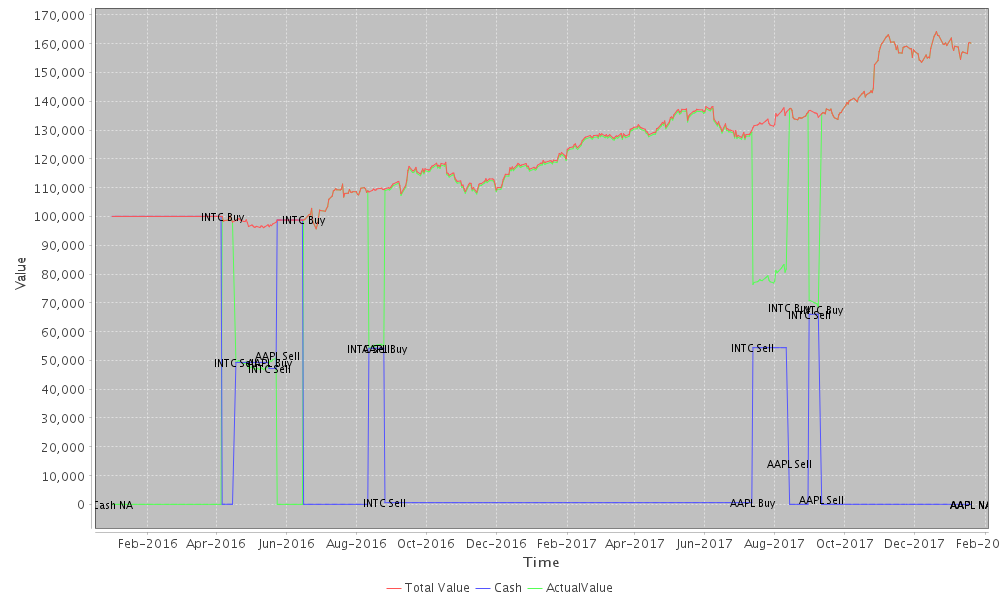

In [23]:
// create chart for total values
var chart = new TimeSeriesChart();
chart.add(account.getTotalValueHistory(), "Total Value");
chart.add(account.getCashHistoryForAllDates(), "Cash");
chart.add(account.getActualValueHistory(), "ActualValue");
chart.addLabels(account.getTransactions())

chart


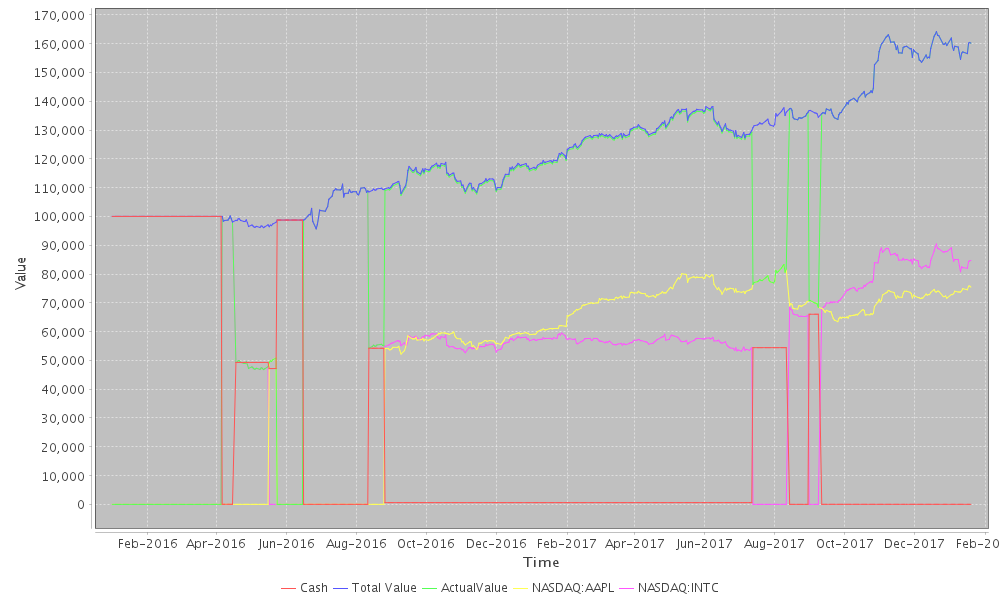

In [24]:
import scala.collection.JavaConversions._

var chart1 = new TimeSeriesChart()
chart1.add(account.getCashHistoryForAllDates(), "Cash");
chart1.add(account.getTotalValueHistory(), "Total Value");
chart1.add(account.getActualValueHistory(), "ActualValue");
for (id <- account.getStockIDs()) {
    var data = account.getActualValueHistory(id);
    chart1.add(data,id.toString())
}
//chart1.addLabels(account.getTransactions())
chart1

The distributed allocation strategy can be configured by defining a Distributor which is
implementing the distributin logic. The default setting is using the EvenDistributor.
Here is the list of the currently implemented alternatives:
- EvenDistributor
- SharpeRatioDistributor
- SharpeRatioOfStockDistributor

## SharpeRatioDistributor ##

In [25]:
import ch.pschatzmann.stocks.strategy.allocation._;

var periods = Context.getDateRanges("2015-01-01","2016-01-01");
var account = new Account("Simulation","USD", 100000.00, periods.get(0).getStart(), new PerTradeFees(10.0));
var trader = new PaperTrader(account);
var apple = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var intel = new StockData(new StockID("INTC", "NASDAQ"), new MarketArchiveHttpReader());
var appleStrategy = new RSI2Strategy(apple);
var intelStrategy = new RSI2Strategy(intel);

var distributor = new SharpeRatioDistributor(account);
var allocationStrategy = new DistributedAllocationStrategy(trader, distributor);
var executor = new StrategyExecutor(trader, allocationStrategy);
executor.addStrategy(appleStrategy);
executor.addStrategy(intelStrategy);
executor.run(periods.get(1));

println(account.getKPIValues())

Displayers.display(account.getTransactions.collect(Collectors.toList()))

[Absolute Return 60187.0680809021, Absolute Return Avarage per day 78.36857823034127, Absolute Return StdDev 925.0958080939445, Return % 60.187068080902094, Return % per year 19.72320046344256, Return % StdDev 0.007275427975944391, Sharp Ratio 1.3967315795266206, Max Draw Down % 8.72040749597196, Max Draw Down Absolute 10356.939044952393, Max Draw Down - Number of days 57, Max Draw Down - High 118766.68664550781, Max Draw Down - Low 108409.74760055542, Max Draw Down - Period 20161018-20161114, Number of Trades 19, Number of Buys 7, Number of Sells 9, Number of Cash Transfers 1, Number of Traded Stocks 2, Total Fees 160.0, Cash 11.073921203613281, Total Value (at actual rates) including cash 160187.0680809021, Total Value (at purchased rates) 112037.7908620633, Realized Gains 12197.790862063299, Unrealized Gains 48149.2772188388]


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2015-01-01 0 0 0 0 ac2ed050-f031-41f0-9d4f-56f944e06ac2 NA CashTransfer 100000 true Key Value ticker INTC exchange NASDAQ 2016-04-06 3281 0 30.4664 10 9c2c0c3c-8d11-4def-8956-f56e1306e867 Buy Market -99970.3027 true Key Value ticker AAPL exchange NASDAQ 2016-05-17 541 0 91.0472 10 rebalance of stocks 47c07691-3c01-4e42-a9e3-afc3ec15256d Buy Market -49266.5203 true Key Value ticker INTC exchange NASDAQ 2016-05-17 -1642 0 28.718 10 6283a260-e7dc-40ad-9459-da82f72acfe4 Sell Market 47144.9191 true Key Value ticker AAPL exchange NASDAQ 2016-05-24 -541 0 95.3419 10 d6d2d883-7dfe-4f54-8c4f-ae80c96e5121 Sell Market 51569.9947 true Key Value ticker INTC exchange NASDAQ 2016-06-16 3252 0 30.356 10 3027273f-b458-4f4a-994c-f52743772c95 Buy Market -98727.6963 true Key Value ticker AAPL exchange NASDAQ 2016-08-26 517 0 104.7099 10 44a0e16a-df90-4e8b-bc49-51137bef8440 Buy Market -54145.0261 true Key Value ticker INTC exchange NASDAQ 2016-08-26 -16 0 34.0317 10 rebalance of stocks f3660618-18a9-41a2-89b7-85049594723b Sell Market 534.5078 true Key Value ticker AAPL exchange NASDAQ 2017-07-13 4 0 146.6647 10 rebalance of stocks ece54b7c-67d0-41dd-a8e4-806bac64995b Buy Market -596.659 true Key Value ticker INTC exchange NASDAQ 2017-07-13 -1611 0 33.7847 10 ab868ef3-d37b-4789-a848-2df736039da3 Sell Market 54417.1001 true Key Value ticker AAPL exchange NASDAQ 2017-08-14 -88 0 159.2774 10 rebalance of stocks df3feb09-0faf-40b9-b3bd-d87ace3499a8 Sell Market 14006.413 true Key Value ticker INTC exchange NASDAQ 2017-08-14 1894 0 36.1259 10 f34e52e5-e671-4f63-871c-5766b6563f49 Buy Market -68432.4768 false Key Value ticker AAPL exchange NASDAQ 2018-01-19 0 0 0 0 rebalance of stocks a9d030e0-bd10-48b5-908c-02d99443e980 NA Market 0 true Key Value ticker INTC exchange NASDAQ 2017-08-31 -1894 0 34.8634 10 b91116de-e402-41b9-bcab-b7cce4de72cb Sell Market 66021.2642 true Key Value ticker AAPL exchange NASDAQ 2017-09-11 -10 0 160.9215 10 rebalance of stocks c8ce8f41-fe92-40d2-a1ac-ccaed12a6ee4 Sell Market 1599.2151 true Key Value ticker INTC exchange NASDAQ 2017-09-11 1901 0 35.5593 10 e14a7e8f-a655-475b-b679-0d48e60934be Buy Market -67608.1703 false Key Value ticker AAPL exchange NASDAQ 2018-01-19 0 0 0 0 e9a81e7c-7e11-4f00-bff4-1a88cb312f88 NA Market 0 true Key Value ticker INTC exchange NASDAQ 2016-08-12 -1625 0 33.3658 10 rebalance of stocks f6c4e06c-2ac6-42a1-8f8c-11aae30a3c6d Sell Market 54209.3799 false Key Value ticker AAPL exchange NASDAQ 2018-01-19 0 0 0 0 785a31fd-6c5a-4a40-b9e3-b2e41d2cc2b9 NA Market 0 true Key Value ticker INTC exchange NASDAQ 2016-04-18 -1639 0 30.058 10 rebalance of stocks d51b1fb8-278e-4027-94db-fefedcbce03e Sell Market 49255.1317

## SharpeRatioOfStockDistributor ##
The sharpe ratio is measuring the risk adusted return. So in the long run it might be of advantate if we prefer stocks with a high sharpe ratio to stocks with a lower one.

The stocks are distributed by the SharpeRatio which is calculated with the stock closing prices

In [26]:
import ch.pschatzmann.stocks.strategy.allocation._;

var periods = Context.getDateRanges("2015-01-01","2016-01-01");
var account = new Account("Simulation","USD", 100000.00, Context.date("2016-01-01"), new PerTradeFees(10.0));
var trader = new PaperTrader(account);
var apple = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var intel = new StockData(new StockID("INTC", "NASDAQ"), new MarketArchiveHttpReader());
var appleStrategy = new RSI2Strategy(apple);
var intelStrategy = new RSI2Strategy(intel);

var distributor = new SharpeRatioOfStockDistributor(account, 0.0);
var allocationStrategy = new DistributedAllocationStrategy(trader, distributor);

var executor = new StrategyExecutor(trader, allocationStrategy);
executor.addStrategy(appleStrategy);
executor.addStrategy(intelStrategy);
executor.run(periods.get(1));

println(account.getKPIValues())

Displayers.display(account.getTransactions.collect(Collectors.toList()))

[Absolute Return 60827.445598602295, Absolute Return Avarage per day 117.88264650891918, Absolute Return StdDev 1127.2149815722971, Return % 60.827445598602296, Return % per year 29.64896768055663, Return % StdDev 0.008846034799164536, Sharp Ratio 1.7234413711155498, Max Draw Down % 8.740579066053773, Max Draw Down Absolute 10395.807270050049, Max Draw Down - Number of days 57, Max Draw Down - High 118937.28311920166, Max Draw Down - Low 108541.47584915161, Max Draw Down - Period 20161018-20161114, Number of Trades 19, Number of Buys 7, Number of Sells 9, Number of Cash Transfers 1, Number of Traded Stocks 2, Total Fees 160.0, Cash 24.211456298828125, Total Value (at actual rates) including cash 160827.4455986023, Total Value (at purchased rates) 111766.7706210201, Realized Gains 11926.770621020096, Unrealized Gains 49060.674977582195]


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2016-01-01 0 0 0 0 5d7f112a-fe54-435a-be8f-079ba19ad185 NA CashTransfer 100000 true Key Value ticker INTC exchange NASDAQ 2016-04-06 3281 0 30.4664 10 cf01b092-0b3d-4e58-8139-70a4d3869c9d Buy Market -99970.3027 true Key Value ticker AAPL exchange NASDAQ 2016-05-17 557 0 91.0472 10 rebalance of stocks 87e6c862-369f-4ce7-a4e7-7cddfd20b01b Buy Market -50723.2751 true Key Value ticker INTC exchange NASDAQ 2016-05-17 -1593 0 28.718 10 f3eb6449-4c40-49da-b96f-bc730e9173b1 Sell Market 45737.7382 true Key Value ticker AAPL exchange NASDAQ 2016-05-24 -557 0 95.3419 10 a0168d31-c8d3-4539-8fb7-f72eda34e7ec Sell Market 53095.4659 true Key Value ticker INTC exchange NASDAQ 2016-06-16 3256 0 30.356 10 030adee1-33c4-4fa2-9a0f-45f87e72bef5 Buy Market -98849.1203 true Key Value ticker AAPL exchange NASDAQ 2016-08-26 529 0 104.7099 10 11f4e86d-5cf2-4fa1-8a2b-78d6b98027dc Buy Market -55401.5451 true Key Value ticker INTC exchange NASDAQ 2016-08-26 -14 0 34.0317 10 rebalance of stocks 20b1f6df-8e89-45f1-925a-32b7ac3c03de Sell Market 466.4443 true Key Value ticker AAPL exchange NASDAQ 2017-07-13 3 0 146.6647 10 rebalance of stocks 33f83976-b049-4af2-bba0-e9421a52a644 Buy Market -449.9942 true Key Value ticker INTC exchange NASDAQ 2017-07-13 -1579 0 33.7847 10 d2a7eb26-3977-41ff-a92e-b171f1d036be Sell Market 53335.9907 true Key Value ticker AAPL exchange NASDAQ 2017-08-14 -80 0 159.2774 10 rebalance of stocks 3251e709-34d2-40cb-88d7-755008cc470e Sell Market 12732.1936 true Key Value ticker INTC exchange NASDAQ 2017-08-14 1831 0 36.1259 10 9d8604ae-35ec-48fb-b26d-c91d19bb6fc5 Buy Market -66156.5443 false Key Value ticker AAPL exchange NASDAQ 2018-01-19 0 0 0 0 rebalance of stocks f6f2c5c9-1519-40a5-a48b-d14959635b52 NA Market 0 true Key Value ticker INTC exchange NASDAQ 2017-08-31 -1831 0 34.8634 10 e32cd4a6-60c8-40ee-965c-9d526614bca7 Sell Market 63824.8705 true Key Value ticker AAPL exchange NASDAQ 2017-09-11 -9 0 160.9215 10 rebalance of stocks 27a5929e-7c00-4555-a560-bd1a4bd14611 Sell Market 1438.2936 true Key Value ticker INTC exchange NASDAQ 2017-09-11 1835 0 35.5593 10 e84fd28b-fef8-4e51-88f1-b0aac7fc97b7 Buy Market -65261.2585 false Key Value ticker AAPL exchange NASDAQ 2018-01-19 0 0 0 0 196a5c65-b843-4100-99df-79cecb1275d3 NA Market 0 true Key Value ticker INTC exchange NASDAQ 2016-08-12 -1663 0 33.3658 10 rebalance of stocks 20ce4f46-b7b5-4209-b926-a497fdbdf4bf Sell Market 55477.2792 false Key Value ticker AAPL exchange NASDAQ 2018-01-19 0 0 0 0 cb87017b-4e4d-47cb-887d-82112a5c7319 NA Market 0 true Key Value ticker INTC exchange NASDAQ 2016-04-18 -1688 0 30.058 10 rebalance of stocks ea220be5-1960-4ad2-8a83-b734cc695176 Sell Market 50727.9758

# Optimizations #

## Optimized DistributedAllocationStrategy - BinarySearchOptimizer ##

We also have the possibility to define an optimizer. 
We just wrap our trading strategy into a OptimizedStrategy to which we pass the selected optimizer.


In [27]:
var periods = Context.getDateRanges("2015-01-01","2016-01-01");
var account = new Account("Simulation","USD", 100000.00, Context.date("2016-01-01"), new PerTradeFees(10.0));
var trader = new PaperTrader(account);
var apple = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var intel = new StockData(new StockID("INTC", "NASDAQ"), new MarketArchiveHttpReader());
var appleStrategy = new RSI2Strategy(apple);
var intelStrategy = new RSI2Strategy(intel);

var allocationStrategy = new DistributedAllocationStrategy(trader);
var executor = new StrategyExecutor(trader, allocationStrategy);
var optimizer = new BinarySearchOptimizer(new SimulatedFitness(account), KPI.AbsoluteReturn);

executor.addStrategy(new OptimizedStrategy(appleStrategy, optimizer, MONTH));
executor.addStrategy(new OptimizedStrategy(intelStrategy, optimizer, MONTH));
executor.run(periods.get(1));

println(account.getKPIValues())

Displayers.display(account.getTransactions.collect(Collectors.toList()))

[Absolute Return 41296.35997772217, Absolute Return Avarage per day 80.0317053831825, Absolute Return StdDev 1107.7395204912796, Return % 41.29635997772217, Return % per year 20.128980105195332, Return % StdDev 0.010370537899183269, Sharp Ratio 1.1089779883625646, Max Draw Down % 17.209354858398438, Max Draw Down Absolute 17209.354858398438, Max Draw Down - Number of days 191, Max Draw Down - High 100000.0, Max Draw Down - Low 82790.64514160156, Max Draw Down - Period 20160101-20160627, Number of Trades 12, Number of Buys 6, Number of Sells 5, Number of Cash Transfers 1, Number of Traded Stocks 2, Total Fees 110.0, Cash 22.136310577392578, Total Value (at actual rates) including cash 141296.35997772217, Total Value (at purchased rates) 99085.8531524589, Realized Gains -804.1468475411002, Unrealized Gains 42210.50682526327]


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2016-01-01 0 0 0 0 9dcf1bee-acd4-4204-8b38-925412246b1f NA CashTransfer 100000 true Key Value ticker INTC exchange NASDAQ 2016-01-06 3210 0 31.142 10 4b1da666-cd71-4cf0-9d4a-7d9d42e68332 Buy Market -99975.8757 true Key Value ticker INTC exchange NASDAQ 2016-02-18 -3210 0 27.9402 10 7d724a28-35c4-46c5-9261-827287f386b5 Sell Market 89678.063 true Key Value ticker INTC exchange NASDAQ 2016-04-27 2974 0 30.153 10 2c3f476f-94e3-4192-8c7d-a94e042a2a4a Buy Market -89685.0557 true Key Value ticker INTC exchange NASDAQ 2016-05-17 -2974 0 28.718 10 93847c9d-3e2d-4339-bf0b-7d50286fec80 Sell Market 85397.2652 true Key Value ticker INTC exchange NASDAQ 2016-06-16 2813 0 30.356 10 ad1a1ef4-3b59-42db-b8c4-e3b49d2c1dc7 Buy Market -85401.4144 true Key Value ticker AAPL exchange NASDAQ 2016-11-01 436 0 109.165 10 73ce356c-f882-4aa8-aae3-c44c3e73ee93 Buy Market -47605.9537 true Key Value ticker AAPL exchange NASDAQ 2017-07-13 5 0 146.6647 10 rebalance of stocks 3c20f1fd-d067-44fc-b68d-c309d6e74093 Buy Market -743.3237 true Key Value ticker INTC exchange NASDAQ 2017-07-13 -1408 0 33.7847 10 43603153-a985-4942-8e14-f264cee2264d Sell Market 47558.8125 true Key Value ticker AAPL exchange NASDAQ 2017-08-21 -67 0 156.6469 10 rebalance of stocks 32219e3d-089e-4a82-bbf1-5793514c30c9 Sell Market 10485.341 true Key Value ticker INTC exchange NASDAQ 2017-08-21 1673 0 34.7143 10 86f1e507-6c04-4559-986f-8bf48ef2ae78 Buy Market -58086.9827 false Key Value ticker AAPL exchange NASDAQ 2018-01-19 0 0 0 0 e18b74c5-f030-4f34-be16-226c03bb2027 NA Market 0 true Key Value ticker INTC exchange NASDAQ 2016-08-30 -1405 0 34.4564 10 rebalance of stocks a716e657-fc20-4ae1-849b-bce4d82963ec Sell Market 48401.2606

In [28]:
var periods = Context.getDateRanges("2015-01-01","2016-01-01");
var account = new Account("Simulation","USD", 100000.00, Context.date("2016-01-01"), new PerTradeFees(10.0));
var trader = new PaperTrader(account);
var apple = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var intel = new StockData(new StockID("INTC", "NASDAQ"), new MarketArchiveHttpReader());
var appleStrategy = new RSI2Strategy(apple);
var intelStrategy = new RSI2Strategy(intel);

var allocationStrategy = new DistributedAllocationStrategy(trader);
var executor = new StrategyExecutor(trader, allocationStrategy);
var optimizer = new BinarySearchOptimizer(new SimulatedFitness(account), KPI.AbsoluteReturn);

executor.addStrategy(new OptimizedStrategy(appleStrategy, optimizer, YEAR));
executor.addStrategy(new OptimizedStrategy(intelStrategy, optimizer, YEAR));
executor.run(periods.get(1));

println(account.getKPIValues())

Displayers.display(account.getTransactions.collect(Collectors.toList()))

[Absolute Return 28061.674724578857, Absolute Return Avarage per day 54.38309055150941, Absolute Return StdDev 1057.9731814347635, Return % 28.061674724578857, Return % per year 13.678031006951397, Return % StdDev 0.010276380270101453, Sharp Ratio 0.8228758081097507, Max Draw Down % 15.96958173751831, Max Draw Down Absolute 15969.58173751831, Max Draw Down - Number of days 258, Max Draw Down - High 100000.0, Max Draw Down - Low 84030.41826248169, Max Draw Down - Period 20160101-20160519, Number of Trades 13, Number of Buys 6, Number of Sells 7, Number of Cash Transfers 1, Number of Traded Stocks 2, Total Fees 130.0, Cash 23.981441497802734, Total Value (at actual rates) including cash 128061.67472457886, Total Value (at purchased rates) 93125.62129592896, Realized Gains -6744.378704071045, Unrealized Gains 34936.0534286499]


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2016-01-01 0 0 0 0 e99e0bdf-1955-4df2-8035-9d74151d19e8 NA CashTransfer 100000 true Key Value ticker INTC exchange NASDAQ 2016-01-06 3210 0 31.142 10 6933a14d-5bd3-470f-9c93-da3ac763551a Buy Market -99975.8757 true Key Value ticker INTC exchange NASDAQ 2016-02-18 -3210 0 27.9402 10 cfe210e4-6032-4716-871b-7b40fd957ed5 Sell Market 89678.063 true Key Value ticker INTC exchange NASDAQ 2016-03-28 2960 0 30.2955 10 1181f197-4b8a-4a98-bde5-993ac854c1f5 Buy Market -89684.5834 true Key Value ticker INTC exchange NASDAQ 2016-05-26 -2960 0 30.1644 10 3c1babc2-de87-4250-869d-4807ed81db81 Sell Market 89276.6582 true Key Value ticker AAPL exchange NASDAQ 2016-08-30 860 0 103.7895 10 f14bfc3d-d7d8-4a56-8563-087db40a06d4 Buy Market -89268.9809 true Key Value ticker AAPL exchange NASDAQ 2016-10-13 -428 0 114.5405 10 rebalance of stocks 82edf994-d635-4fe9-b5e1-7a3c18c43e77 Sell Market 49013.3522 true Key Value ticker INTC exchange NASDAQ 2016-10-13 1374 0 35.6822 10 a05ec3f8-b49d-40d0-a1d4-32585e6ec437 Buy Market -49037.3028 true Key Value ticker INTC exchange NASDAQ 2017-07-13 -1374 0 33.7847 10 e7565ec9-b5f3-4d5d-88f8-1e2b9b1866ff Sell Market 46410.1338 true Key Value ticker AAPL exchange NASDAQ 2017-08-14 -69 0 159.2774 10 rebalance of stocks f77ac3df-847e-41a8-a904-037026442e14 Sell Market 10980.142 true Key Value ticker INTC exchange NASDAQ 2017-08-14 1588 0 36.1259 10 67006337-1b0a-4275-9252-5e4e26638da2 Buy Market -57377.9478 true Key Value ticker INTC exchange NASDAQ 2017-08-31 -1588 0 34.8634 10 a4c4a738-bf9b-4779-94b6-048086f4d08f Sell Market 55353.0663 true Key Value ticker AAPL exchange NASDAQ 2017-10-12 -2 0 155.4412 10 rebalance of stocks 2553e977-e3e9-4565-b73c-1eb334c9fb33 Sell Market 300.8824 true Key Value ticker INTC exchange NASDAQ 2017-10-12 1428 0 38.9591 10 9fd5d67b-5a3c-4f8f-9e2e-a428ab311667 Buy Market -55643.6258